# MN5813: Global COVID-19 Analysis

The COVID-19  pandemic had significantly affected the global health, economies and daily life. Tracking and analyzing the spread, recovery, and mortality rates of the virus is essential for understanding its dynamics and implementing effective solutions.

**Project AIM:**
This project aims to find trends, patterns, and insights into how the epidemic has spread over the world. The goal is to produce insightful visualizations and useful information by examining data on confirmed cases, recoveries, and deaths across nations and different time periods.

**Objectives:**
1) To identify patterns in confirmed cases, recoveries, and deaths across different countries and regions.
2) To analyse the number of confirmed, recovered cases and deaths over different waves (First, Second and Post-Second).
3) To use the data to predict potential future scenarios, enabling better preparedness and response strategies.

**Context:** \
The COVID-19 pandemic has seen a rise in requirements for data analysis and visualization in understanding and mitigating the effects of this pandemic. The role of analysis in pandemic has been reflected in studies of Dong et al. (2020), where the Johns Hopkins COVID-19 Dashboard provided real-time tracking of the virus. This work shows the importance of accessible and interactive platforms for public awareness and decision-making. This project aims to contribute to this growing literature by exploring COVID-19 data through various analysis of confirmed cases, deaths, and recoveries globally. This project provides a comprehensive analysis of the COVID-19 pandemic, offering insights into global and country-specific trends. The findings aim to inform better preparedness for future public health crises and underscore the importance of data-driven decision-making.

**Data Source:** \
Covid-19: \
https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset \
This dataset contains information on the number of impacted patients, deaths, and recovery from the 2019 new coronavirus along with its date, province and country. It also contains different files specific to confirmed, recovered and death cases along with latitude and longitude. \
The data is available starting from 22nd January 2020 to 29th May 2021. \
The COVID-19 dataset was chosen because it provides a global view of one of the most significant public health crises in recent history. This dataset allows for meaningful analysis of trends, patterns, and disparities across countries. It also offers valuable insights into the spread, recovery, and impact of the virus.

World Population: \
https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis/input?select=world_population.csv \
This dataset contains the world population recorded for selected years from 1970 to 2022. It included the rank of country along with its area, density, growth rate and world population percentage. This dataset is chosen for specific analysis purposes that would only require the country and 2020 population.

**Tools:**
1) *pandas*: used it for data manipulation and analysis
2) *matplotlib*: creating basic visualisations
3) *seaborn*: used to provide advance statistical visualisation with minimal code
4) *plotly*: used for interactive visualisation

**DATA LOADING:**

In [51]:
# Read the covid_19_data.csv file
import pandas as pd

df1 = pd.read_csv('covid_19_data.csv')
#df1.head(10)
df1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [52]:
# Convert the .csv file to .json file
df1.to_json("covid_data.json", orient="records")
covid_data = pd.read_json("covid_data.json")

# Print first 10 records
covid_data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


The following csv files contain individual records of Confirmed, Recovered and Death cases. This data contains date wise information. This not only contains country and province but also Latitude and Longitude (which is later used for visualisation).

In [53]:
# Read the time_series_covid_19_confirmed.csv file
df2 = pd.read_csv('time_series_covid_19_confirmed.csv')
df2.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [54]:
# Read the time_series_covid_19_deaths.csv file
df3 = pd.read_csv('time_series_covid_19_deaths.csv')
df3.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,72699,73391,73688,74063,74480,75056,75588,76135,76693,77108
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,4364,4371,4386,4392,4394,4400,4411,4416,4423,4428
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


In [55]:
# Read the time_series_covid_19_recovered.csv file
df4 = pd.read_csv('time_series_covid_19_recovered.csv')
df4.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1188,1188,1192,1192,1200,1200,1200,1200,1206,1206
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3035134,3060145,3083298,3106949,3133183,3157660,3181288,3219474,3252843,3288467
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,209980,210464,210835,211057,211375,211634,211957,212265,212566,212752
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**DATA CLEANING:** 
1) Check datatypes
2) Tidy up the data (using melt())
3) Check for duplicates
4) Check and handle null values
5) Check and handle negative values

In [56]:
# Printing info to check the datatypes
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None


In [57]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
None


In [58]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
None


In [59]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1015.6+ KB
None


**The following cleaning is performed to reduce the number of columns present and then further the dates are grouped by months, having fewer rows, for easier analysis.**

In [60]:
# Converting date columns to long format
# Specify start and end column names
start_col = '1/22/20'
end_col = '5/29/21'

# Get the list of columns for melting
columns_to_melt = df2.loc[:, start_col:end_col].columns

# melt() used to convert "wide" dataframe into "long"
df2_melted = pd.melt(
    df2, 
    id_vars = ["Country/Region","Province/State","Lat","Long"],
    value_vars = columns_to_melt,
    var_name = "Date",
    value_name = "Confirmed"
)

print("Melted Dataframe:")
df2_melted

Melted Dataframe:


,Country/Region,Province/State,Lat,Long,Date,Confirmed
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
136339,Vietnam,NaN,14.058324,108.277199,5/29/21,6908
136340,West Bank and Gaza,NaN,31.952200,35.233200,5/29/21,307838
136341,Yemen,NaN,15.552727,48.516388,5/29/21,6731
136342,Zambia,NaN,-13.133897,27.849332,5/29/21,94751


In [61]:
# Convert date column to datetime datatype
df2_melted["Date"] = pd.to_datetime(df2_melted["Date"])

# Create a new column for Month
df2_melted["Month"] = df2_melted["Date"].dt.to_period("M")  # 'M' indicates Month                              # (pandas, n.d.)

# Group by Country, Province, Latitude, Longitude and Month, summing up the confirmed cases
monthly_confirmed = df2_melted.groupby(["Country/Region","Province/State","Lat","Long", "Month"])["Confirmed"].sum().reset_index()
monthly_confirmed

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\2923253125.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Country/Region,Province/State,Lat,Long,Month,Confirmed
0,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0
1,Australia,Australian Capital Territory,-35.4735,149.0124,2020-02,0
2,Australia,Australian Capital Territory,-35.4735,149.0124,2020-03,579
3,Australia,Australian Capital Territory,-35.4735,149.0124,2020-04,3028
4,Australia,Australian Capital Territory,-35.4735,149.0124,2020-05,3314
...,...,...,...,...,...,...
1423,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-01,34597
1424,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-02,51735
1425,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-03,69457
1426,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-04,70874


In [62]:
# Converting date columns to long format
# Specify start and end column names
start_col = '1/22/20'
end_col = '5/29/21'

# Get the list of columns for melting
columns_to_melt = df2.loc[:, start_col:end_col].columns

# melt() used to convert "wide" dataframe into "long"
df3_melted = pd.melt(
    df3, 
    id_vars = ["Country/Region"],
    value_vars = columns_to_melt,
    var_name = "Date",
    value_name = "Deaths"
)

print("Melted Dataframe:")
df3_melted

Melted Dataframe:


,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
136339,Vietnam,5/29/21,47
136340,West Bank and Gaza,5/29/21,3492
136341,Yemen,5/29/21,1319
136342,Zambia,5/29/21,1276


In [63]:
# Convert date column to datetime datatype
df3_melted["Date"] = pd.to_datetime(df3_melted["Date"])

# Create a new column for Month
df3_melted["Month"] = df3_melted["Date"].dt.to_period("M")  # 'M' indicates Month

# Group by Country and Month, summing up the death cases
monthly_deaths = df3_melted.groupby(["Country/Region", "Month"])["Deaths"].sum().reset_index()
monthly_deaths

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\2009798306.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Country/Region,Month,Deaths
0,Afghanistan,2020-01,0
1,Afghanistan,2020-02,0
2,Afghanistan,2020-03,27
3,Afghanistan,2020-04,890
4,Afghanistan,2020-05,5007
...,...,...,...
3276,Zimbabwe,2021-01,23012
3277,Zimbabwe,2021-02,38753
3278,Zimbabwe,2021-03,46556
3279,Zimbabwe,2021-04,46375


In [64]:
# Converting date columns to long format
# Specify start and end column names
start_col = '1/22/20'
end_col = '5/29/21'

# Get the list of columns for melting
columns_to_melt = df2.loc[:, start_col:end_col].columns

# melt() used to convert "wide" dataframe into "long"
df4_melted = pd.melt(
    df4, 
    id_vars = ["Country/Region"],
    value_vars = columns_to_melt,
    var_name = "Date",
    value_name = "Recovered"
)

print("Melted Dataframe:")
df4_melted

Melted Dataframe:


,Country/Region,Date,Recovered
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
128929,Vietnam,5/29/21,2896
128930,West Bank and Gaza,5/29/21,300524
128931,Yemen,5/29/21,3399
128932,Zambia,5/29/21,91594


In [65]:
# Convert date column to datetime datatype
df4_melted["Date"] = pd.to_datetime(df4_melted["Date"])

# Create a new column for Month
df4_melted["Month"] = df4_melted["Date"].dt.to_period("M")  # 'M' indicates Month

# Group by Country and Month, summing up the recovered cases
monthly_recovered = df4_melted.groupby(["Country/Region", "Month"])["Recovered"].sum().reset_index()
monthly_recovered

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\1221428022.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Country/Region,Month,Recovered
0,Afghanistan,2020-01,0
1,Afghanistan,2020-02,0
2,Afghanistan,2020-03,26
3,Afghanistan,2020-04,2927
4,Afghanistan,2020-05,24129
...,...,...,...
3276,Zimbabwe,2021-01,531530
3277,Zimbabwe,2021-02,849842
3278,Zimbabwe,2021-03,1056857
3279,Zimbabwe,2021-04,1050250


In [66]:
# Check if duplicate values are present
print(covid_data.duplicated().sum())
print(monthly_confirmed.duplicated().sum())
print(monthly_deaths.duplicated().sum())
print(monthly_recovered.duplicated().sum())

0
0
0
0


In [67]:
# Check if null values are present inorder to deal with them
print(covid_data.isnull().sum())
print("-----------------------------")
print("\n",monthly_confirmed.isnull().sum())
print("-----------------------------")
print("\n",monthly_deaths.isnull().sum())
print("-----------------------------")
print("\n",monthly_recovered.isnull().sum())

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
-----------------------------

 Country/Region    0
Province/State    0
Lat               0
Long              0
Month             0
Confirmed         0
dtype: int64
-----------------------------

 Country/Region    0
Month             0
Deaths            0
dtype: int64
-----------------------------

 Country/Region    0
Month             0
Recovered         0
dtype: int64


**Handle null values:**

In the dataset, there are null values for Province/State. In order to handle it, I have printed the records that are null and then checked for what it can be replaced with. Therefore, the null values are replaced with 'Unknown' as one cannot be sure and guess the province in a country to replace it with.

In [68]:
# Print null records
null_records = covid_data[covid_data["Province/State"].isnull()]
null_records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,None,Japan,1/22/2020 17:00,2,0,0
36,37,01/22/2020,None,Thailand,1/22/2020 17:00,4,0,2
37,38,01/22/2020,None,South Korea,1/22/2020 17:00,1,0,0
39,40,01/22/2020,None,Kiribati,1/22/2020 17:00,0,0,0
75,76,01/23/2020,None,Japan,1/23/20 17:00,1,0,0
...,...,...,...,...,...,...,...,...
305831,305832,05/29/2021,None,Vietnam,2021-05-30 04:20:55,6908,47,2896
305832,305833,05/29/2021,None,West Bank and Gaza,2021-05-30 04:20:55,307838,3492,300524
305833,305834,05/29/2021,None,Yemen,2021-05-30 04:20:55,6731,1319,3399
305834,305835,05/29/2021,None,Zambia,2021-05-30 04:20:55,94751,1276,91594


In [69]:
# Check for 'Unknown' value records to replace null
unknown_records = covid_data[covid_data.isin(['Unknown']).any(axis=1)]
unknown_records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
38,39,01/22/2020,Unknown,China,1/22/2020 17:00,0,0,0
86,87,01/23/2020,Unknown,China,1/23/20 17:00,0,0,0
129,130,01/24/2020,Unknown,China,1/24/20 17:00,0,0,0
175,176,01/25/2020,Unknown,China,1/25/20 17:00,0,0,0
224,225,01/26/2020,Unknown,China,1/26/20 16:00,0,0,0
...,...,...,...,...,...,...,...,...
306369,306370,05/29/2021,Unknown,Mexico,2021-05-30 04:20:55,0,0,1924865
306370,306371,05/29/2021,Unknown,Netherlands,2021-05-30 04:20:55,3882,14,0
306371,306372,05/29/2021,Unknown,Peru,2021-05-30 04:20:55,0,0,1897522
306372,306373,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0,0,0


In [70]:
# Change the value to 'Unknown' because we do have Province/State that is not known
covid_data['Province/State'] = covid_data['Province/State'].fillna('Unknown')

In [71]:
# Check whether null values are replaced
null_records = covid_data[covid_data["Province/State"].isnull()]
null_records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


The following operations are performed to deal with negative values that are present in the Confirmed, Recovered and Deaths columns. As the value cannot be negative, it is replaced with 0.

In [72]:
# Identify records with negative values

negative_records = covid_data[covid_data['Confirmed'] < 0]
negative_records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147524,147525,11/02/2020,Unknown,Colombia,2021-04-02 15:13:53,-302844,0,0


In [73]:
negative_records1 = covid_data[covid_data['Deaths'] < 0]
negative_records1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118363,118364,09/24/2020,Unknown,Colombia,2021-04-02 15:13:53,0,-178,-12684
141534,141535,10/25/2020,Unknown,Colombia,2021-04-02 15:13:53,0,-154,-8072


In [74]:
negative_records2 = covid_data[covid_data['Recovered'] < 0]
negative_records2

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118363,118364,09/24/2020,Unknown,Colombia,2021-04-02 15:13:53,0,-178,-12684
141534,141535,10/25/2020,Unknown,Colombia,2021-04-02 15:13:53,0,-154,-8072
145277,145278,10/30/2020,Unknown,Colombia,2021-04-02 15:13:53,0,505,-854405


In [75]:
# Replace negative values with 0
covid_data.loc[covid_data['Confirmed'] < 0, 'Confirmed'] = 0
covid_data.loc[covid_data['Deaths'] < 0, 'Deaths'] = 0
covid_data.loc[covid_data['Recovered'] < 0, 'Recovered'] = 0 

In [76]:
# Check values have been replaced
negative_records = covid_data[covid_data['Confirmed'] < 0]
negative_records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [77]:
negative_records1 = covid_data[covid_data['Deaths'] < 0]
negative_records1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [78]:
negative_records2 = covid_data[covid_data['Recovered'] < 0]
negative_records2

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


**Data Cleaning Insights:** 
1) Ensures each column has the appropriate data type for its intended operations.
2) Tidy data allows for a more easier data manipulation, filtering, and visualization.
3) It was necessary to drop duplicates because even a small number of duplicates in columns can lead to inaccurate analysis.
4) Handling missing values helps identify data completeness.
5) Negative values in the dataset made no sense and thus handling them was necessary.

**DATA WRANGLING:**

The purpose to add a new column "Wave" is to better analyse the impact of Covid-19 in specific waves, whether the situation has improved or worsened and where the impact is low/high inorder for actions to be taken accordingly.

In [79]:
# Create new column "Wave" based on specific time period
covid_data["Wave"] = pd.cut(covid_data["ObservationDate"], bins=["01/21/2020","01/22/2021","04/01/2021","06/01/2021"], labels=["First Wave","Second Wave","Post-Second Wave"])
# Printing few records to show the results
range_1 = covid_data.iloc[0:4]
range_2 = covid_data.iloc[10000:10005]
range_3 = covid_data.iloc[306423:306429]
result = pd.concat([range_1, range_2, range_3])
result

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Wave
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,First Wave
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,First Wave
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,First Wave
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,First Wave
10000,10001,03/29/2020,Unknown,Namibia,3/8/20 5:31,11,0,2,Second Wave
10001,10002,03/29/2020,Unknown,Nepal,3/8/20 5:31,5,0,1,Second Wave
10002,10003,03/29/2020,Unknown,Netherlands,3/8/20 5:31,10866,771,250,Second Wave
10003,10004,03/29/2020,Unknown,New Zealand,3/8/20 5:31,514,1,56,Second Wave
10004,10005,03/29/2020,Unknown,Nicaragua,3/8/20 5:31,4,1,0,Second Wave
306423,306424,05/29/2021,Zakarpattia Oblast,Ukraine,2021-05-30 04:20:55,61611,1586,58882,Post-Second Wave


Merging the time_series_covid_19_confirmed.csv, time_series_covid_19_deaths.csv and time_series_covid_19_recovered.csv for further visualisation process. It will be used to showcase the confirmed/recovered/deaths based on latitude and longitude over the time period.

In [80]:
# Using left join to merge data as monthly_confirmed has the required columns.
merge1 = pd.merge(monthly_confirmed, monthly_deaths, how="left", on="Country/Region")          # (Stack Overflow, 2022)

In [81]:
merged_data = pd.merge(merge1, monthly_recovered, how="left", on="Country/Region")

In [82]:
# All 3 csv files merged and displayed
merged_data

,Country/Region,Province/State,Lat,Long,Month_x,Confirmed,Month_y,Deaths,Month,Recovered
0,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0,2020-01,0,2020-01,4
1,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0,2020-01,0,2020-02,195
2,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0,2020-01,0,2020-03,2307
3,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0,2020-01,0,2020-04,91483
4,Australia,Australian Capital Territory,-35.4735,149.0124,2020-01,0,2020-01,0,2020-05,195488
...,...,...,...,...,...,...,...,...,...,...
412687,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-05,69709,2021-05,3709653,2021-01,242466
412688,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-05,69709,2021-05,3709653,2021-02,303091
412689,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-05,69709,2021-05,3709653,2021-03,376948
412690,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,2021-05,69709,2021-05,3709653,2021-04,415975


In [83]:
# Drop the duplicate columns of Month
merged_data.drop(["Month_x","Month_y"],axis=1)

,Country/Region,Province/State,Lat,Long,Confirmed,Deaths,Month,Recovered
0,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,2020-01,4
1,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,2020-02,195
2,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,2020-03,2307
3,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,2020-04,91483
4,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,2020-05,195488
...,...,...,...,...,...,...,...,...
412687,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,69709,3709653,2021-01,242466
412688,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,69709,3709653,2021-02,303091
412689,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,69709,3709653,2021-03,376948
412690,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,69709,3709653,2021-04,415975


**DATA ANALYSIS:**
1) Top 10 countries with highest Confirmed, Recovered and Death cases.
2) Calculated the mortality and recovery rates based on Confirmed, Recovered and Deaths columns.
3) Total number of Confirmed, Recovered and Death cases worldwide.
4) Total number of Confirmed, Recovered and Death cases in First, Second and Post-Second waves.
5) Per Capita Analysis for confirmed, recovered, and deaths per million people country-wise.

In [84]:
# Top 10 countries with highest recovery rates based on time range
# Feel free to change the time period
# First wave time period
start_date = "01/21/2020"
end_date = "01/22/2021"

# Filter the data for the given time period
covid_data_filtered = covid_data[(covid_data['ObservationDate'] >= start_date) & (covid_data['ObservationDate'] <= end_date)]

# Group by 'Country' and calculate total recoveries
recovery_by_country = covid_data_filtered.groupby("Country/Region")["Recovered"].sum().reset_index()

# Find the country with the highest recovery
highest_recovery = recovery_by_country.sort_values("Recovered", ascending=False).head(10)

print("Countries with highest recovery:")
highest_recovery

Countries with highest recovery:


,Country/Region,Recovered
79,India,20584540
23,Brazil,15420002
145,Russia,6070698
181,Turkey,4586082
85,Italy,3682578
37,Colombia,3612686
65,Germany,3611542
6,Argentina,3262581
117,Mexico,2556720
141,Poland,2431464


In [85]:
# Top 10 countries with highest death cases based on time range
# Feel free to change the time period
# Second wave time period
start_date = "01/22/2021"
end_date = "04/01/2021"

# Filter the data for the given time period
covid_data_filtered = covid_data[(covid_data['ObservationDate'] >= start_date) & (covid_data['ObservationDate'] <= end_date)]

# Group by 'Country' and calculate total deaths
deaths_by_country = covid_data_filtered.groupby("Country/Region")["Deaths"].sum().reset_index()

# Find the country with the highest deaths
highest_deaths = deaths_by_country.sort_values("Deaths", ascending=False).head(10)

print("Countries with highest deaths:")
highest_deaths

Countries with highest deaths:


,Country/Region,Deaths
214,US,35217322
27,Brazil,18064447
137,Mexico,12654002
96,India,11005119
213,UK,8320460
102,Italy,6929110
71,France,5995174
172,Russia,5832983
194,Spain,4780198
77,Germany,4739093


In [86]:
# Top 10 countries with highest confirmed cases in 2020
# Feel free to change the time period
# First wave time period
start_date = "01/01/2020"
end_date = "12/31/2020"

# Filter the data for the given time period
covid_data_filtered = covid_data[(covid_data['ObservationDate'] >= start_date) & (covid_data['ObservationDate'] <= end_date)]

# Group by 'Country' and calculate total confirmed cases
confirmed_by_country = covid_data_filtered.groupby("Country/Region")["Confirmed"].sum().reset_index()

# Find the country with the highest confirmed cases
highest_confirmed = confirmed_by_country.sort_values("Confirmed", ascending=False).head(10)

print("Countries with highest confirmed cases:")
highest_confirmed

Countries with highest confirmed cases:


,Country/Region,Confirmed
214,US,6049145667
96,India,3226768088
27,Brazil,2653587540
172,Russia,930548849
71,France,855188962
213,UK,783794384
194,Spain,649111763
102,Italy,636694305
212,Turkey,618940956
77,Germany,524166833


**Observation:** \
By the above analysis, it is clear that US was the most affected country, with highest number of confirmed cases as well as deaths. Surprisingly, China did not make any list where it all begun. India being the second country where most number of confirmed cases were found, but also India has a high number of recovered cases. \
**Let's check the mortality rate and recovery rate of each country. \
Mortality Rate:** helps in understanding how severe the disease is and \
**Recovery Rate:** helps to understand how effective treatment is in patient recovery. \
This can also help in predicting future outcomes such as whether the disease is becoming less severe over time and treatments given are working and which regions require more attention.

In [87]:
# Group the confirmed, recovered and death cases by country
total = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Calculate mortality and recovery rates
total['Mortality Rate (%)'] = ((total['Deaths'] / total['Confirmed']) * 100).round(2)
total['Recovery Rate (%)'] = ((total['Recovered'] / total['Confirmed']) * 100).round(2)

# Handle cases where 0
total['Mortality Rate (%)'] = total['Mortality Rate (%)'].fillna(0)
total['Recovery Rate (%)'] = total['Recovery Rate (%)'].fillna(0)

total

,Country/Region,Confirmed,Deaths,Recovered,Mortality Rate (%),Recovery Rate (%)
0,Azerbaijan,1,0,0,0.00,0.00
1,"('St. Martin',)",2,0,0,0.00,0.00
2,Afghanistan,17026442,669075,13464399,3.93,79.08
3,Albania,19768869,375955,13945256,1.90,70.54
4,Algeria,27684358,834464,18959299,3.01,68.48
...,...,...,...,...,...,...
224,West Bank and Gaza,41819444,440378,37003116,1.05,88.48
225,Yemen,962066,237613,506523,24.70,52.65
226,Zambia,13493953,205990,12625626,1.53,93.57
227,Zimbabwe,6484581,237234,5594887,3.66,86.28


In [88]:
# Total number of Confirmed cases worldwide within the entire time period
global_statistics = {
    "Total Confirmed Cases": covid_data['Confirmed'].sum(),
    "Total Recovered Cases": covid_data['Recovered'].sum(),
    "Total Deaths": covid_data['Deaths'].sum()
}

print("Global Statistics:")
for key, value in global_statistics.items():
    print(f"{key}: {value:,}") # Comma used as seperator

Global Statistics:
Total Confirmed Cases: 26,252,354,602
Total Recovered Cases: 15,451,113,073
Total Deaths: 624,013,349


In [89]:
# Total number of confirmed, recovered and death cases in first, second and post-second wave
# Group data by 'wave'
wave_cases = covid_data.groupby('Wave')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
print("COVID-19 Cases by Wave:")
wave_cases

COVID-19 Cases by Wave:


C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\1713386618.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Wave,Confirmed,Deaths,Recovered
0,First Wave,195861462,4214952,107912611
1,Second Wave,7857470784,173169280,4416264042
2,Post-Second Wave,8971520516,198749808,5251065257


In [90]:
# Read the world_population.csv file for performing per capita analysis
population = pd.read_csv('world_population.csv')
population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [91]:
# Filter column in new dataset because only country and one population column is needed
# 2020 Population is considered because it is closest to the covid data
selected_columns = ["Country/Territory", "2020 Population"]
world_population = population[selected_columns]
world_population.head()

,Country/Territory,2020 Population
0,Afghanistan,38972230
1,Albania,2866849
2,Algeria,43451666
3,American Samoa,46189
4,Andorra,77700


In [92]:
# Filter column in new dataset because only country, confirmed, recovered and deaths column is needed
selected_columns1 = ["Country/Region", "Confirmed","Recovered","Deaths"]
covid_data1 = covid_data[selected_columns1]
covid_data1.head()

,Country/Region,Confirmed,Recovered,Deaths
0,Mainland China,1,0,0
1,Mainland China,14,0,0
2,Mainland China,6,0,0
3,Mainland China,1,0,0
4,Mainland China,0,0,0


In [93]:
# Change the column name in order to merge the datasets
world_population.rename(columns={"Country/Territory": "Country/Region"}, inplace=True)
world_population.rename(columns={"2020 Population": "Population"}, inplace=True)
world_population.head()

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\3532130815.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\3532130815.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country/Region,Population
0,Afghanistan,38972230
1,Albania,2866849
2,Algeria,43451666
3,American Samoa,46189
4,Andorra,77700


In [94]:
# Merge covid and population dataset
merge_datasets = pd.merge(covid_data1, world_population, how="left", on="Country/Region")
merge_datasets

,Country/Region,Confirmed,Recovered,Deaths,Population
0,Mainland China,1,0,0,NaN
1,Mainland China,14,0,0,NaN
2,Mainland China,6,0,0,NaN
3,Mainland China,1,0,0,NaN
4,Mainland China,0,0,0,NaN
...,...,...,...,...,...
306424,Ukraine,102641,95289,2335,43909666.0
306425,Netherlands,29147,0,245,17434557.0
306426,Mainland China,1364,1324,1,NaN
306427,Ukraine,87550,83790,1738,43909666.0


In [95]:
# Drop rows with missing population data
merge_datasets = merge_datasets.dropna(subset=['Population'])

# Calculate per capita metrics (per million people)
merge_datasets['Cases per Million'] = (merge_datasets['Confirmed'] / merge_datasets['Population']) * 1_000_000
merge_datasets['Deaths per Million'] = (merge_datasets['Deaths'] / merge_datasets['Population']) * 1_000_000
merge_datasets['Recoveries per Million'] = (merge_datasets['Recovered'] / merge_datasets['Population']) * 1_000_000

# Group by country and calculate average per capita metrics
per_capita_stats = merge_datasets.groupby('Country/Region')[['Cases per Million', 'Deaths per Million', 'Recoveries per Million']].mean().reset_index().round(2)

print("Per Capita Analysis (per million people) Country-wise:")
per_capita_stats

Per Capita Analysis (per million people) Country-wise:


C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\2254658848.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\2254658848.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\2254658848.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Country/Region,Cases per Million,Deaths per Million,Recoveries per Million
0,Afghanistan,947.69,37.24,749.43
1,Albania,15426.57,293.38,10882.14
2,Algeria,1385.07,41.75,948.55
3,Andorra,67462.74,909.97,61301.88
4,Angola,326.92,7.99,252.70
...,...,...,...,...
199,Venezuela,2855.45,27.54,2601.15
200,Vietnam,12.93,0.21,10.21
201,Yemen,71.81,17.74,37.81
202,Zambia,1627.67,24.85,1522.93


**Data Analysis Insights:** 
1) Identifying top 10 countries with highest recovery shows how well a country is treating the patients; with highest confirmed cases it shows that the country is struggling in handling the situation; with highest deaths it shows no proper treatment is given or working and requires external help.
2) Global analysis of total number of confirmed, recovered and death cases provide a view of the pandemic's impact. It highlights how the pandemic has evolved globally.
3) Total number of cases in different waves helps identify the impact in stages and reveals actions like lockdowns, vaccinations, and public awareness campaigns to be taken.
4) Per capita analysis makes it easier to compare countries for example countries with high deaths per capita but low recoveries per capita indicate challenges in healthcare systems or pandemic response strategies.

**DATA VISUALISATION:**

**1) Pie Chart showing COVID-19 Case Distribution Across Waves: Confirmed, Recovered, and Deaths**

C:\Users\Riddhi Shelwante\AppData\Local\Temp\ipykernel_21444\1468707277.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



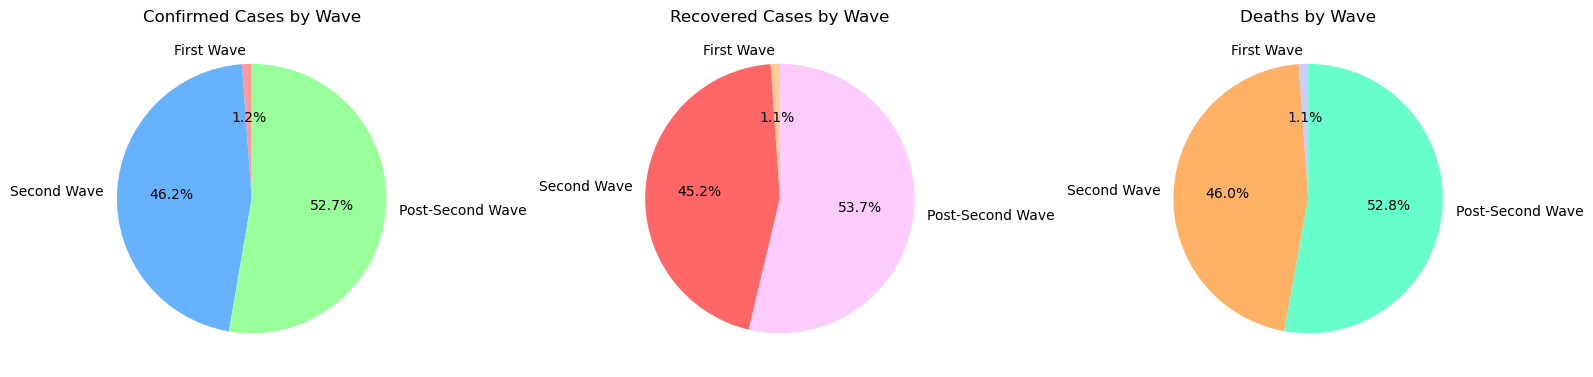

In [96]:
import matplotlib.pyplot as plt

# Aggregate data by 'Wave'
wave_data = covid_data.groupby('Wave')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Define color schemes for each chart
colors_confirmed = ['#FF9999', '#66B2FF', '#99FF99']  # Colors for Confirmed
colors_recovered = ['#FFCC99', '#FF6666', '#FFCCFF']  # Colors for Recovered
colors_deaths = ['#CCCCFF', '#FFB266', '#66FFCC']     # Colors for Deaths

# Create pie chart for Confirmed cases
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)  
plt.pie(                                                 #(Mckinney, 2023, CH 9.2, Table 9.3)
    wave_data['Confirmed'], 
    labels=wave_data.index, 
    autopct='%1.1f%%', 
    colors=colors_confirmed, 
    startangle=90
)
plt.title('Confirmed Cases by Wave')

# Create pie chart for Recovered cases
plt.subplot(1, 3, 2)
plt.pie(
    wave_data['Recovered'], 
    labels=wave_data.index, 
    autopct='%1.1f%%', 
    colors=colors_recovered, 
    startangle=90
)
plt.title('Recovered Cases by Wave')

# Create pie chart for Deaths
plt.subplot(1, 3, 3)
plt.pie(
    wave_data['Deaths'], 
    labels=wave_data.index, 
    autopct='%1.1f%%', 
    colors=colors_deaths, 
    startangle=90
)
plt.title('Deaths by Wave')

# Display the charts
plt.tight_layout()
plt.show()

This pie charts allow us to compare the number of confirmed, recovered, and death cases across the different waves.
This helps in identifying which wave had the highest impact in terms of infections, recoveries, and fatalities.
It is observed that confirmed cases have increased in the post-second wave where the situation should've been stable if proper strategies were undertaken. On the other hand, recovery rates have also increased in that period which shows that the treatment given were working fine.

**2) Top 10 Countries with High Mortality Rates and Low Recovery Rates**

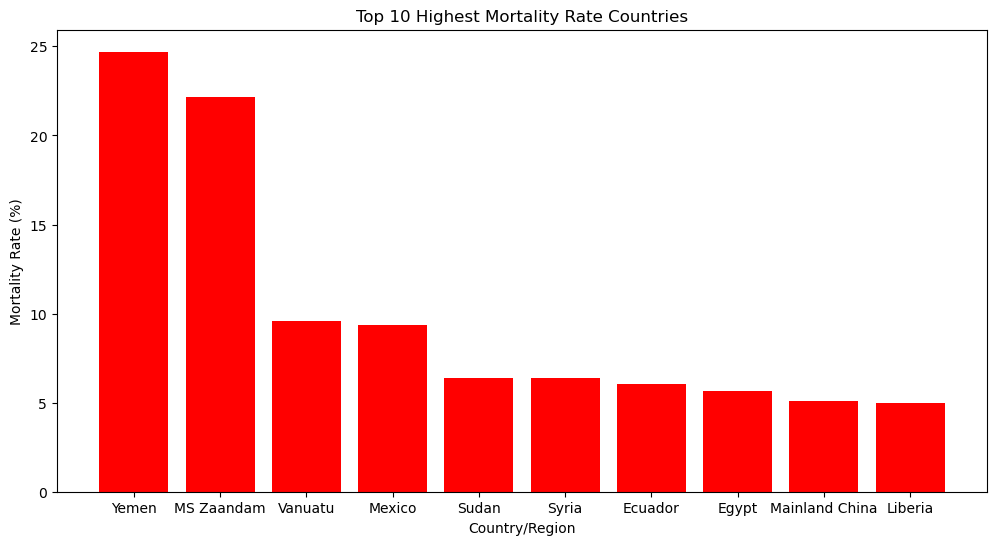

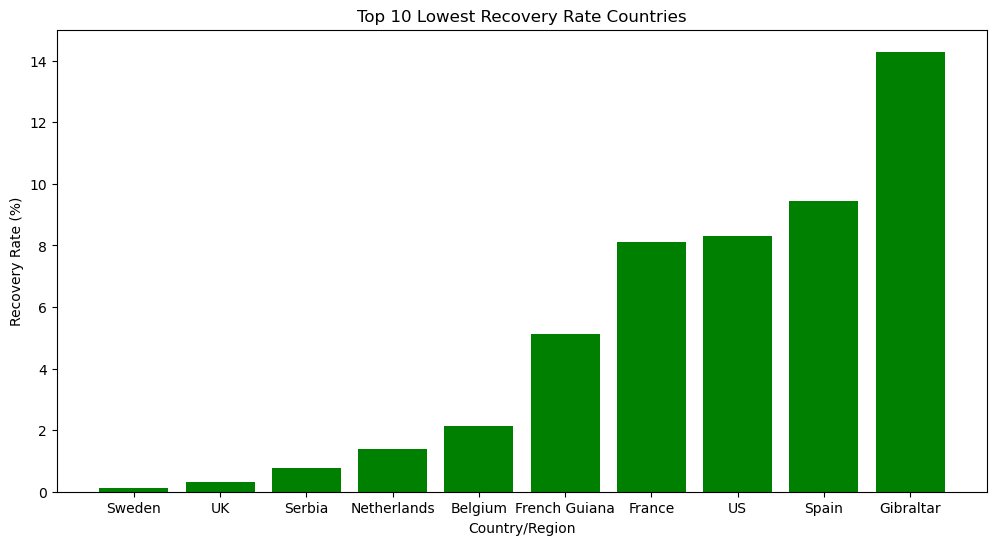

In [97]:
# Top 10 Highest Mortality Rate Countries
high_mortality = total.groupby('Country/Region')[['Mortality Rate (%)']].sum().reset_index()
top_high_mortality = high_mortality.sort_values(by='Mortality Rate (%)', ascending=False).head(10)

# Top 10 Lowest Recovery Rate Countries
low_recovery = total.groupby('Country/Region')[['Recovery Rate (%)']].sum().reset_index()
# Excluding the countries with 0.00 recover rate, comment below line if you want to include those
low_recovery = low_recovery[low_recovery['Recovery Rate (%)'] > 0] 
top_low_recovery = low_recovery.sort_values(by='Recovery Rate (%)', ascending=True).head(10)

# Plotting Top 10 Highest Mortality Rate
plt.figure(figsize=(12, 6))
plt.bar(top_high_mortality['Country/Region'], top_high_mortality['Mortality Rate (%)'], color='red')        #(Mckinney, 2023, CH 9.2)
plt.title('Top 10 Highest Mortality Rate Countries')
plt.xlabel('Country/Region')
plt.ylabel('Mortality Rate (%)')
plt.show()

# Plotting Top 10 Lowest Recovery Rate
plt.figure(figsize=(12, 6))
plt.bar(top_low_recovery['Country/Region'], top_low_recovery['Recovery Rate (%)'], color='green')
plt.title('Top 10 Lowest Recovery Rate Countries')
plt.xlabel('Country/Region')
plt.ylabel('Recovery Rate (%)')
plt.show()

The above bar chart identifies countries with the highest fatality rates and reveals places where the pandemic's impact was most severe. Therefore, the countries with high mortality rates can be prioritized for assistance during future pandemics, with a focus on increasing emergency medical response and healthcare access. \
Countries with low recovery rates may face unique challenges, such as delays in seeking treatment, poor healthcare infrastructure, or limited access to medication and vaccines. Hence, these countries can be targeted to provide faster and immediate medical services.

**3) Number of Confirmed, Recovered and Death Cases w.r.t Total Number of Cases over given Time Period**

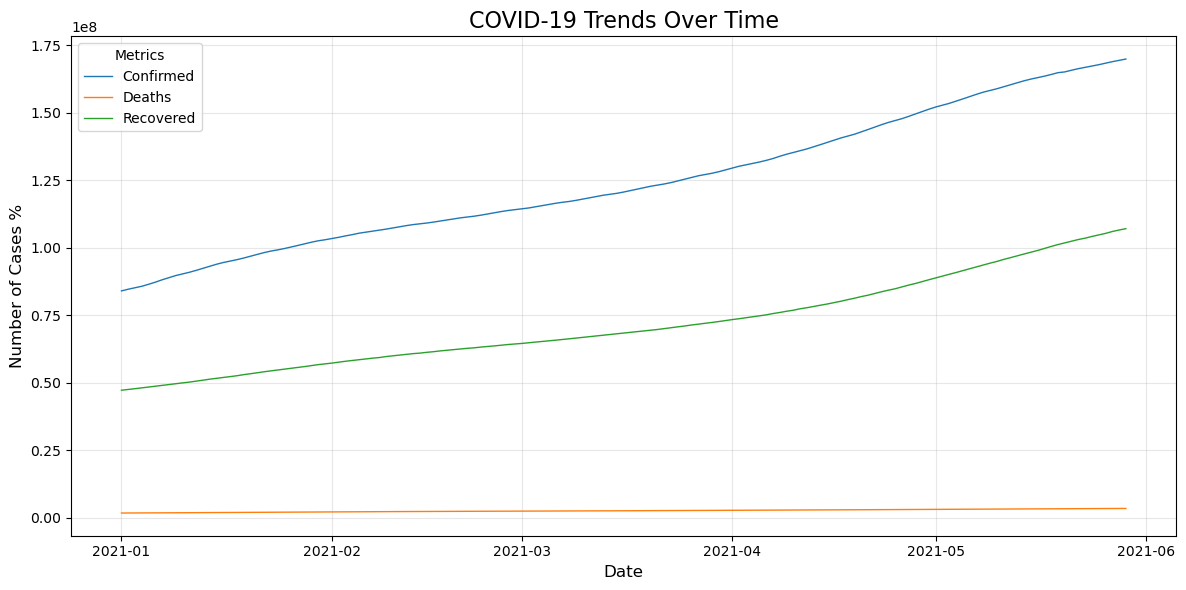

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the date range
start_date = "01/01/2021"  
end_date = "05/29/2021" 

covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

# Filter the dataset by the date range
cvd_filter = covid_data[(covid_data['ObservationDate'] >= start_date) & (covid_data['ObservationDate'] <= end_date)]
trends = cvd_filter.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


trends_melted = trends.melt(id_vars="ObservationDate", 
                            value_vars=["Confirmed", "Deaths", "Recovered"], 
                            var_name="Metric", 
                            value_name="Count")

# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_melted, y="Count", x="ObservationDate", hue="Metric", linewidth=1)             #(Mckinney, 2023, CH 9.1)

# Add labels, title, legend, and grid
plt.title("COVID-19 Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases %", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

This linechart shows the number of cases against time period. It gives the percent of those cases w.r.t the total number of cases. In this it is observed that even though the number of confirmed cases is very high, the deaths are at the bottom. This indicates the strategies taken by each country w.r.t medications has been working better. It also indicates that recovery rates are climbing and not falling down. This can be used to track if there's a downfall in recovery cases and actions to be taken rigorously.

**4) Per Capita Analysis of Top 15 Countries**

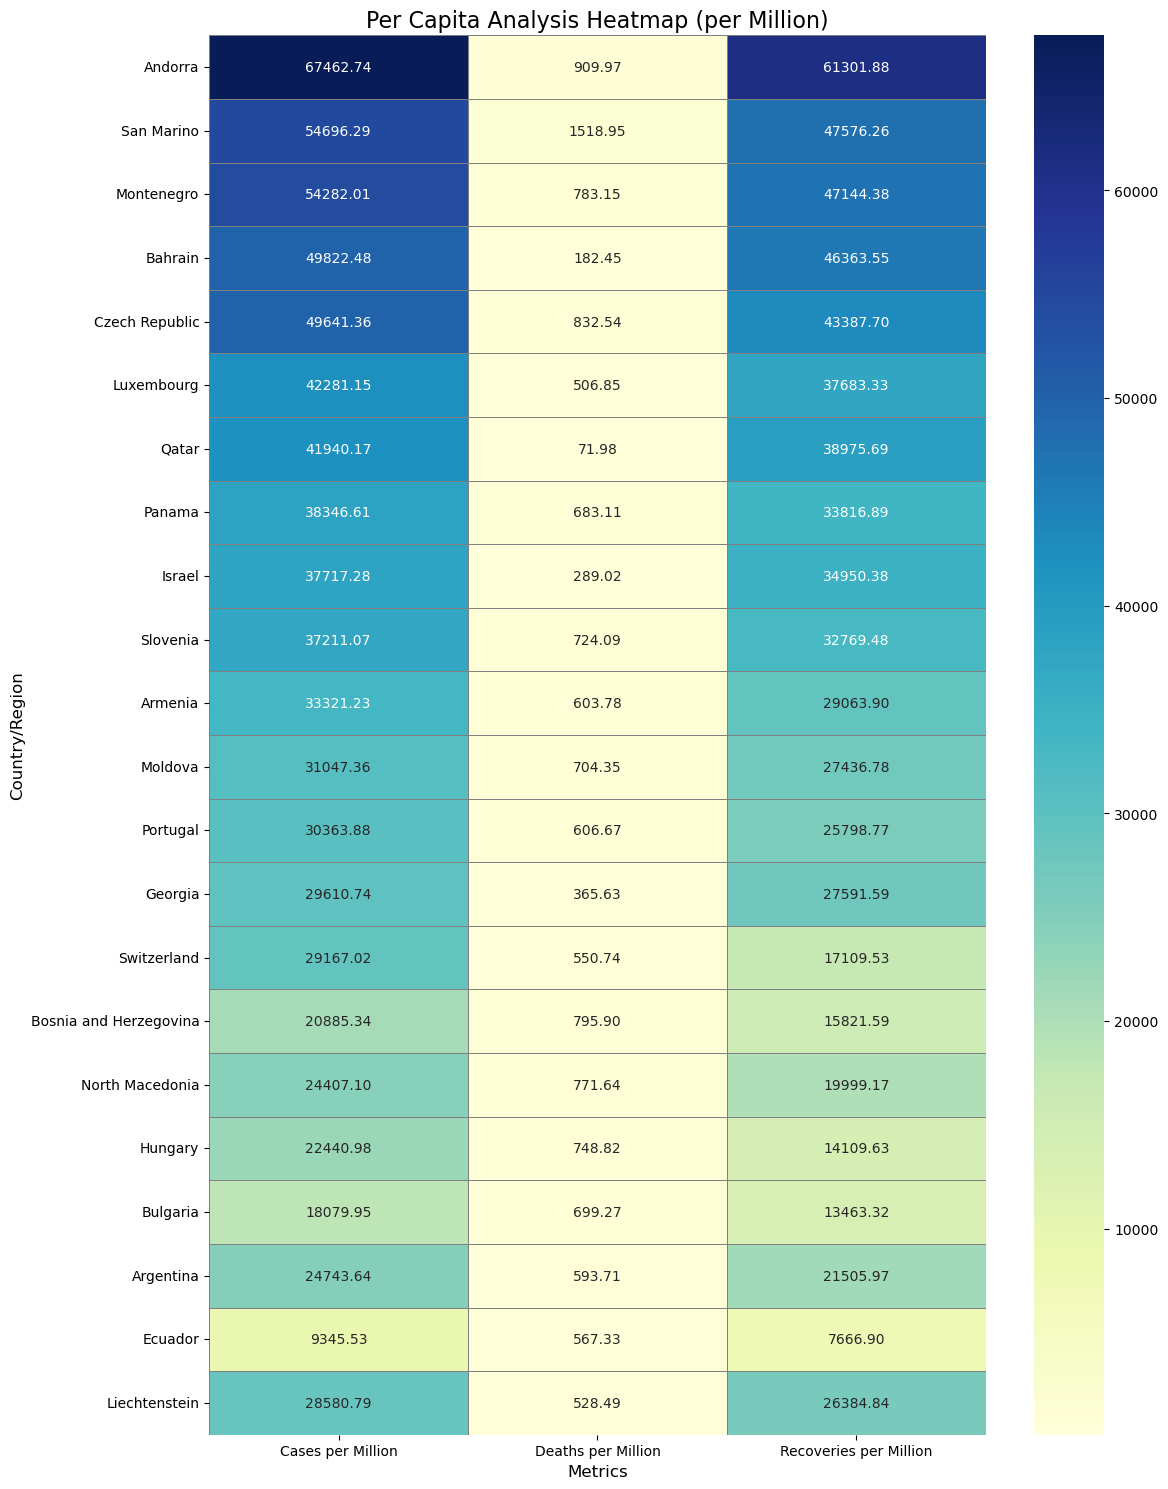

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sort data to get the top 15 countries by each metric
top_cases = per_capita_stats.nlargest(15, "Cases per Million")
top_deaths = per_capita_stats.nlargest(15, "Deaths per Million")
top_recoveries = per_capita_stats.nlargest(15, "Recoveries per Million")

# Combine the top 15 data into one DataFrame
top_combined = pd.concat([top_cases, top_deaths, top_recoveries]).drop_duplicates()

# Pivot DataFrame for heatmap compatibility
heatmap_data = top_combined.set_index("Country/Region")

# Create a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(                                                           # (Seaborn, n.d)
    heatmap_data,
    annot=True,  # Display data values on the heatmap
    fmt=".2f",  # Format the values to two decimal places
    cmap="YlGnBu",  # Color palette
    linewidths=0.5,  # Line width between cells
    linecolor="gray",  # Line color between cells
)

# Add titles and labels
plt.title("Per Capita Analysis Heatmap (per Million)", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Country/Region", fontsize=12)

plt.tight_layout()
plt.show()


The heatmap represents how different countries perform across the three metrics: Cases per Million, Deaths per Million, and Recoveries per Million. This allows for a quick comparison of how the pandemic impacted countries per capita. It showcases how countries with high cases and recoveries but low deaths might indicate better healthcare responses or management of the pandemic and countries with high cases but lower recovery rates may need more medical resources or international support.

**5) Global distribution of COVID-19 confirmed cases. Countries focused: Australia, Canada, China, Denmark, France, Netherlands, United Kingdom**

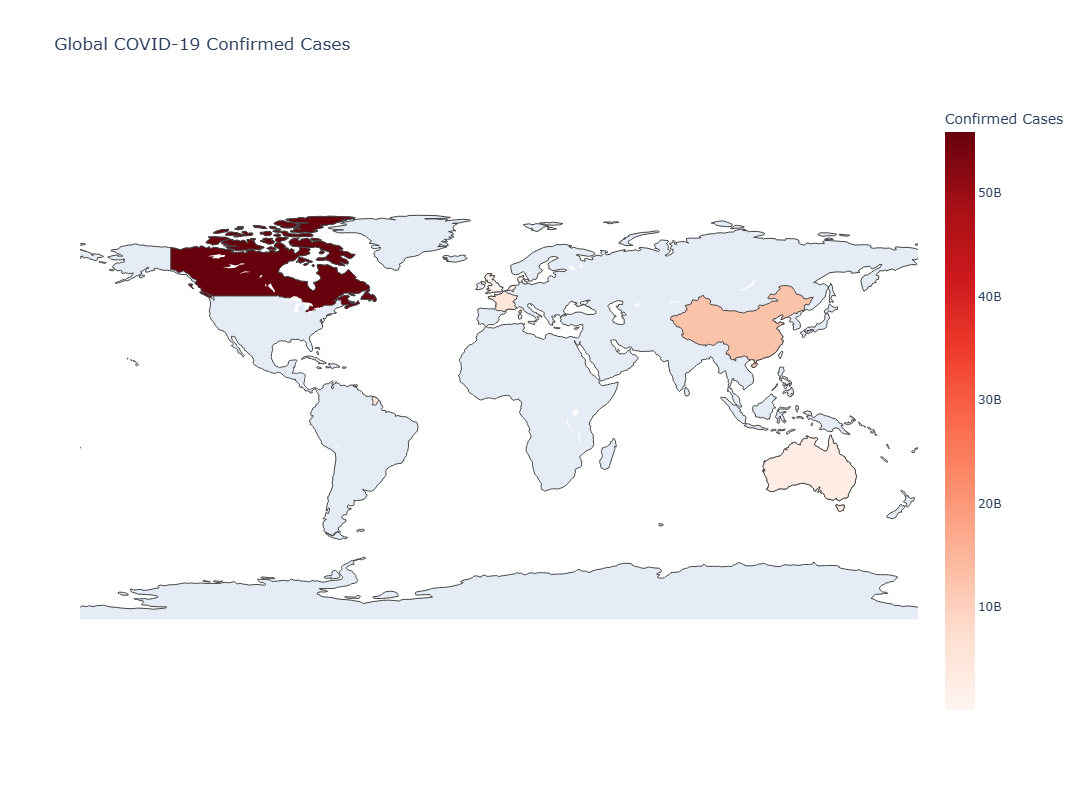

In [100]:
import plotly.express as px

# Sample Data Preparation: Aggregate data by country
choropleth_data = merged_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Lat', 'Long']].sum().reset_index()

metric= 'Confirmed'

# Create a Choropleth Map for total confirmed cases
fig = px.choropleth(                                                                   # (Plotly, n.d)
    choropleth_data,
    locations="Country/Region",  # Column with country names
    locationmode="country names",  # Match country names
    color=metric,  # Column to base color intensity
    hover_name="Country/Region",
    hover_data={metric: True, 'Lat': True, 'Long': True},
    color_continuous_scale="Reds",  # Color scale
    title="Global COVID-19 Confirmed Cases",
    labels={'Confirmed': 'Total Confirmed Cases'}
)

# Update layout for better visuals
fig.update_layout(
    autosize=True,
    width=1000,
    height=800,
    geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular"),
    coloraxis_colorbar=dict(title="Confirmed Cases")
)

# Show the plot

fig.show()

This choropleth map provides a worldwide perspective on the pandemic, giving a birds-eye view of its impact on many countries. It allows to identify regions where resources such as vaccines, PPE, or medical staff are most needed. It would also help in raising public awareness as this map shows confirmed cases and proper lockdown strategies are to be followed. Here, one can easily point out that Canada needs to improvise in various terms as it has most number of confirmed cases as compared to others.

**CONCLUSION:**

This project has provided me with insights into COVID-19 data analysis by examining the trends and patterns, calculating additional factors like mortality and recovery rates and visualising global as well as country-specific statistics. Performing analysis on this has highlighted how effectively a country has managed the pandemic in terms of implementing precautions and providing treatment. These findings reveal patterns in confirmed cases, recoveries, and deaths, allowing for a deeper understanding of how different countries and regions have been affected over time.

**Findings:** \
I have learnt about how countries have done during the COVID-19 pandemic. The number of cases have given insights on which countries need a helping hand and which countries are dealing it well.\
I have calculated the mortality and recovery rates across different countries to show variation in how different regions coped with the pandemic. \
Furthermore, I have analysed 3 waves: The first, second, and post-second waves with the purpose to portray a trend in COVID-19 progress, and how the pandemic evolved. \
Later I calculated the Per Capita Analysis that presented insights into how COVID-19 spread is affecting various countries on a much minute scale and reflects the impact of population size on healthcare accessibility. \
Finally, the visualisations have provided a quick-look analysis to drive decision-making.\
Analysis of this dataset gave me an insider look into how these numbers and data could help in current situation as well as if any further pandemic occurs, we would know which countries are to be taken into urgent considerations. This also means, the countries with high recovery or low confirmed cases are well equipped and have strict strategies in place.

**Limitations:** \
I could have enhanced this project by using this historical data inorder to forecast future. Furthermore, I could have included gender and age data which would reveal deeper analysis and provided views on which age group or gender was affected the most. These would be the furture improvements in this project.

**REFERENCES:**
1) Dong, E., Du, H., & Gardner, L. (2020). An interactive web-based dashboard to track COVID-19 in real time. *The Lancet Infectious Diseases*, 20(5), 533-534.
2) Reppel, A. and colleagues (2024) *MN5813: Module Handbook. MSc Business Analytics.* Version 1.5. 26 December.
3) McKinney, W., n.d. Python for Data Analysis. [online] Available at: https://wesmckinney.com/book/ [Accessed 20 December 2024].
4) Plotly (n.d.) *Choropleth Maps in Python*. Available at: https://plotly.com/python/choropleth-maps/ (Accessed: 10 January 2025).
5) Stack Overflow (2022) *Merging 2 datasets in Python*. Available at: https://stackoverflow.com/questions/74834625/merging-2-datasets-in-python (Accessed: 02 January 2025).
6) pandas (n.d.) *pandas.Series.dt.to_period*. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html (Accessed: 27 December 2024).
7) Seaborn (n.d.) *seaborn.heatmap*. Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html (Accessed: 11 January 2025).

**Link to GitHub:** \
https://github.com/riyashelwante/2502398_MN5813_Individual